# Impact of covid-19 Lockdown on PM 2.5 in Thailand
## Member
- Krist Pornpairin
- Yanika Dontong

In [ ]:
!gdown --id 1k69DAOYdhYBBtZrjl1rNUKjy25YeSNL1
!unzip Final2.zip

Downloading...
From: https://drive.google.com/uc?id=1k69DAOYdhYBBtZrjl1rNUKjy25YeSNL1
To: /content/Final2.zip
18.7MB [00:00, 87.1MB/s]
Archive:  Final2.zip
   creating: Final2/
  inflating: Final2/Bangkok.txt      
  inflating: Final2/Chiang_Mai.txt   
  inflating: Final2/Chon_Buri.txt    
   creating: Final2/hotspot/
  inflating: Final2/hotspot/viirs-snpp_2020_Cambodia.csv  
  inflating: Final2/hotspot/viirs-snpp_2020_Lao_PDR.csv  
  inflating: Final2/hotspot/viirs-snpp_2020_Malaysia.csv  
  inflating: Final2/hotspot/viirs-snpp_2020_Myanmar.csv  
  inflating: Final2/hotspot/viirs-snpp_2020_Thailand.csv  
  inflating: Final2/Kanchanaburi.txt  
  inflating: Final2/Khon_Kaen.txt    
  inflating: Final2/Songkhla.txt     
  inflating: Final2/Thailand.txt     
   creating: Final2/wind/
  inflating: Final2/wind/Bangkok_wind_1.csv  
  inflating: Final2/wind/Bangkok_wind_2.csv  
  inflating: Final2/wind/Chiang_Mai_wind_1.csv  
  inflating: Final2/wind/Chiang_Mai_wind_2.csv  
  inflating: Final

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
def to_monthdate(pm25_2020,pm25_2019,pm25_2018):
  pm25_2020 = pm25_2020.reset_index()
  pm25_2020['2020'] = pm25_2020['PM2.5']
  pm25_2020 = pm25_2020.drop(['datetime','Year','PM2.5'],axis=1)
  pm25_2018 = pm25_2018.reset_index()
  pm25_2018['2018'] = pm25_2018['PM2.5']
  pm25_2018 = pm25_2018.drop(['datetime','Year','PM2.5'],axis=1)
  pm25_2019 = pm25_2019.reset_index()
  pm25_2019['2019'] = pm25_2019['PM2.5']
  pm25_2019 = pm25_2019.drop(['datetime','Year','PM2.5'],axis=1)
  pm25_2020= pm25_2020.merge(pm25_2018,right_index=True,left_index=True,suffixes=('', '_delme'))
  pm25_2020 = pm25_2020[[c for c in pm25_2020.columns if not c.endswith('_delme')]]
  pm25_2020= pm25_2020.merge(pm25_2019,right_index=True,left_index=True,suffixes=('', '_delme'))
  pm25_2020 = pm25_2020[[c for c in pm25_2020.columns if not c.endswith('_delme')]]
  pm25_2020=pm25_2020.set_index(['Month','Day'])
  return pm25_2020.drop(['UTC_Hour'],axis=1)

In [ ]:
def trend_plot(df):
    
    # Prepare data
    df['year'] = [d.year for d in df.index]
    df['month'] = [d.strftime('%b') for d in df.index]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=df['PM2.5'], data=df, ax=axes[0])
    sns.pointplot(x='month', y=df['PM2.5'], data=df.loc[~df.year.isin([2016, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

In [ ]:
def trend_plot_no_outliers(df):
    
    # Prepare data
    df['year'] = [d.year for d in df.index]
    df['month'] = [d.strftime('%b') for d in df.index]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=df['PM2.5'], data=df, ax=axes[0], showfliers=False)
    sns.pointplot(x='month', y=df['PM2.5'], data=df.loc[~df.year.isin([2016, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

#### Bangkok Data

In [ ]:
pm25_Bangkok = pd.DataFrame()
pm25_Bangkok = pd.read_csv('/content/Final2/Bangkok.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Bangkok['datetime'] = pd.to_datetime({'year': pm25_Bangkok['Year'], 'month': pm25_Bangkok['Month'], 'day':pm25_Bangkok['Day'],'hour': pm25_Bangkok['UTC_Hour']})
pm25_Bangkok = pm25_Bangkok.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Bangkok['datetime'] = pm25_Bangkok['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Bangkok['datetime'] = pm25_Bangkok['datetime'].dt.tz_localize(None)
pm25_Bangkok = pm25_Bangkok.set_index('datetime')
pm25_Bangkok = pm25_Bangkok[~pm25_Bangkok.index.duplicated(keep='first')]
pm25_Bangkok.index = pd.DatetimeIndex(pm25_Bangkok.index)

In [ ]:
pm25_Bangkok.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Bangkok_2018 =  pm25_Bangkok[pm25_Bangkok['Year']==2018]
pm25_Bangkok_2019 =  pm25_Bangkok[pm25_Bangkok['Year']==2019]
pm25_Bangkok_2020 =  pm25_Bangkok[pm25_Bangkok['Year']==2020]

In [ ]:
pm25_Bangkok_monthdate = to_monthdate(pm25_Bangkok_2020,pm25_Bangkok_2019,pm25_Bangkok_2018)

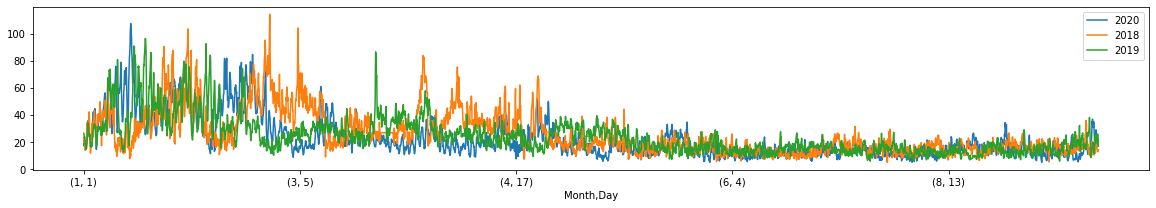

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
pm25_Bangkok_monthdate.plot()

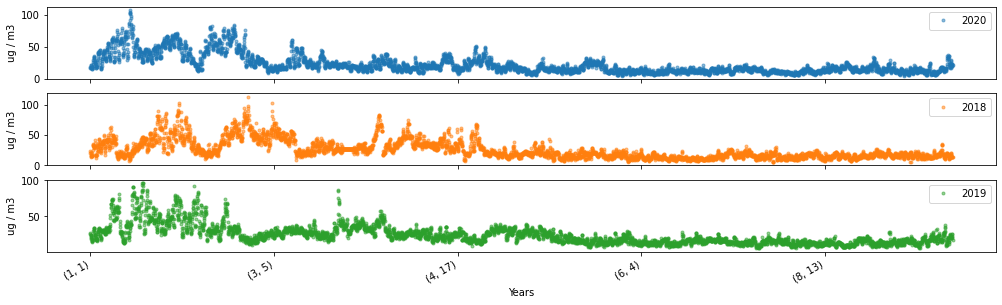

In [ ]:
axes = pm25_Bangkok_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

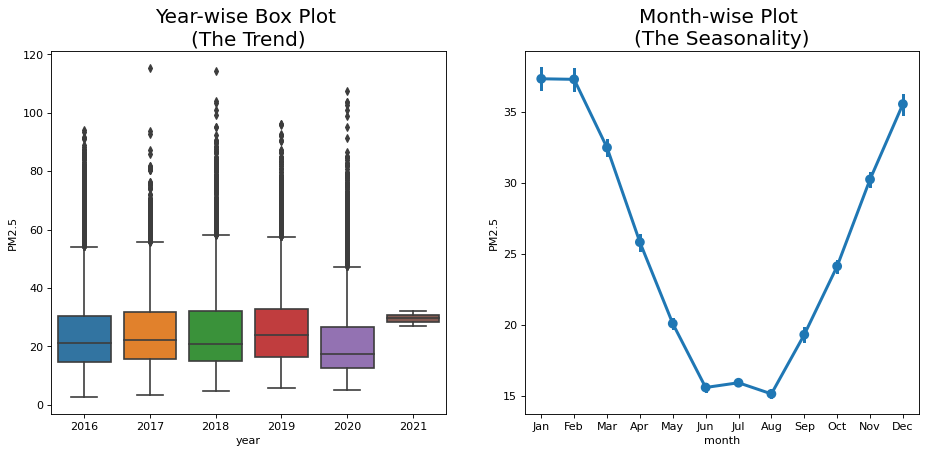

In [ ]:
trend_plot(pm25_Bangkok)

##### lockdown Bangkok

In [ ]:
lockdown = pm25_Bangkok.loc['2020-03-26':'2020-05-31']
Bangkok_year2019_lockdown = pd.DataFrame(pm25_Bangkok.loc['2019-03-26':'2019-05-31'])
Bangkok_year2018_lockdown = pd.DataFrame(pm25_Bangkok.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Bangkok_year2019_lockdown.index, y=Bangkok_year2019_lockdown['PM2.5'],
                    marker=dict(color=Bangkok_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Bangkok_year2018_lockdown.index, y=Bangkok_year2018_lockdown['PM2.5'],
                    marker=dict(color=Bangkok_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Bangkok_year2019_lockdown,Bangkok_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

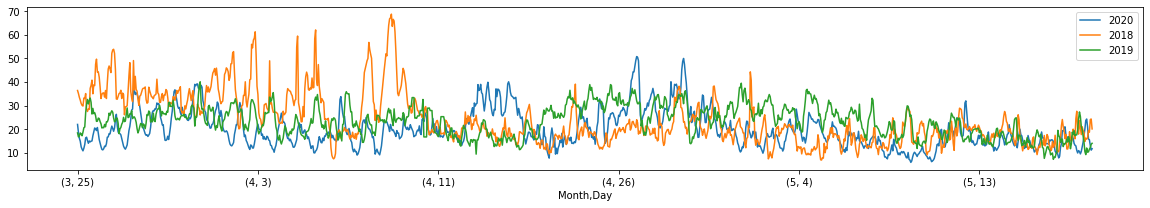

In [ ]:
lockdown_monthdate.plot()
plt.show()

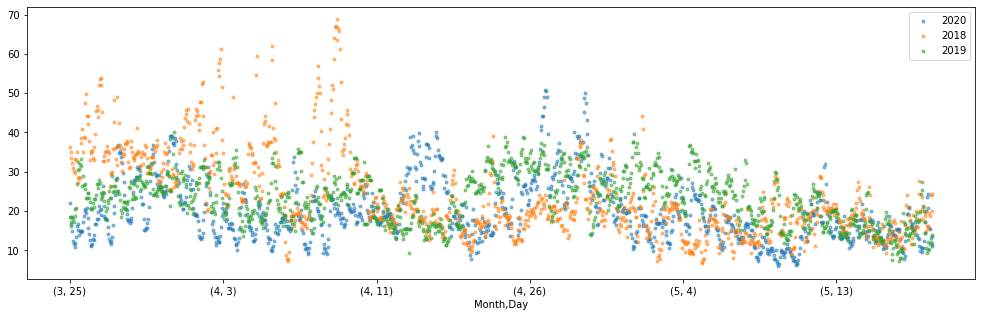

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_bangkok_lockdown =  pd.read_csv('/content/Final2/wind/Bangkok_wind_1.csv')

In [ ]:
wind_bangkok_lockdown['Date'] = pd.to_datetime(wind_bangkok_lockdown['Date'],yearfirst=True)
wind_bangkok_lockdown['Speed'] = wind_bangkok_lockdown['Speed'].astype('float64')
wind_bangkok_lockdown['Dir'] = wind_bangkok_lockdown['Dir'].astype('int64')

In [ ]:
wind_bangkok_lockdown = wind_bangkok_lockdown.set_index('Date')
wind_bangkok_lockdown = wind_bangkok_lockdown.loc['2020-03-26':'2020-05-31']

In [ ]:
def angle_range(st, ed, x):
    if st < ed: ed += 360
    return st <= x.values < ed

def wind_news(df):
    df = df[df['Dir'] > 0]
    df['Dir'][ df['Dir'] < 11.25 ] = df['Dir'][ df['Dir'] < 11.25 ].apply(lambda x : x+360)
    
    wind_df = pd.DataFrame(columns=['direction', 'speed', 'frequency'])
    angle = [ (i * 22.5 - 11.25 + 360) % 360.0 for i in range(16) ]
    direction = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WMW', 'NW', 'NNW']
    speed = [i*2.5 for i in range(1, 9)]
    tot = 0
    for ang, d  in zip(angle, direction):
        for s in speed:
            cnt = df[(ang <= df['Dir'] ) & ( df['Dir'] < ang+22.5 )&  (s-2.5 <= df['Speed']) & (df['Speed'] < s) ].shape[0]
            tot += cnt
            wind_df = wind_df.append({'direction': d, 'speed':s, 'frequency': cnt }, ignore_index=True)
    return wind_df 

In [ ]:
def wind_direction_plot(df):
    wind = wind_news(df)
    fig = px.bar_polar(wind, r="frequency", theta="direction",
                       color="speed", template="plotly_dark",
                       color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
    fig.show()

In [ ]:
def plot_wind(wind,lockdown):
  fig, ax = plt.subplots(3,1, figsize=(17, 5))
  wind_direction_plot(wind)
  sns.lineplot(y=lockdown['PM2.5'],x=lockdown.index.date,ax=ax[0])
  sns.lineplot(y=wind['Dir'],x=wind.index.date, ax=ax[1])
  sns.lineplot(y=wind['Speed'],x=wind.index.date, ax=ax[2])
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



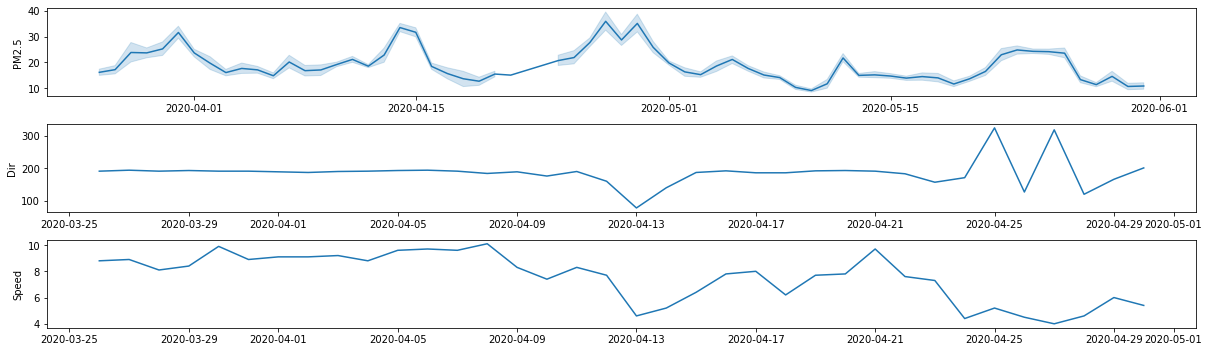

In [ ]:
plot_wind(wind_bangkok_lockdown,lockdown)

#### Chiang Mai Data

In [ ]:
pm25_Chiang_Mai = pd.DataFrame()
pm25_Chiang_Mai = pd.read_csv('/content/Final2/Chiang_Mai.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Chiang_Mai['datetime'] = pd.to_datetime({'year': pm25_Chiang_Mai['Year'], 'month': pm25_Chiang_Mai['Month'], 'day':pm25_Chiang_Mai['Day'],'hour': pm25_Chiang_Mai['UTC_Hour']})
pm25_Chiang_Mai = pm25_Chiang_Mai.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Chiang_Mai['datetime'] = pm25_Chiang_Mai['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Chiang_Mai['datetime'] = pm25_Chiang_Mai['datetime'].dt.tz_localize(None)
pm25_Chiang_Mai = pm25_Chiang_Mai.set_index('datetime')
pm25_Chiang_Mai = pm25_Chiang_Mai[~pm25_Chiang_Mai.index.duplicated(keep='first')]
pm25_Chiang_Mai.index = pd.DatetimeIndex(pm25_Chiang_Mai.index)

In [ ]:
pm25_Chiang_Mai.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Chiang_Mai_2018 =  pm25_Chiang_Mai[pm25_Chiang_Mai['Year']==2018]
pm25_Chiang_Mai_2019 =  pm25_Chiang_Mai[pm25_Chiang_Mai['Year']==2019]
pm25_Chiang_Mai_2020 =  pm25_Chiang_Mai[pm25_Chiang_Mai['Year']==2020]

In [ ]:
pm25_Chiang_Mai_monthdate = to_monthdate(pm25_Chiang_Mai_2020,pm25_Chiang_Mai_2019,pm25_Chiang_Mai_2018)

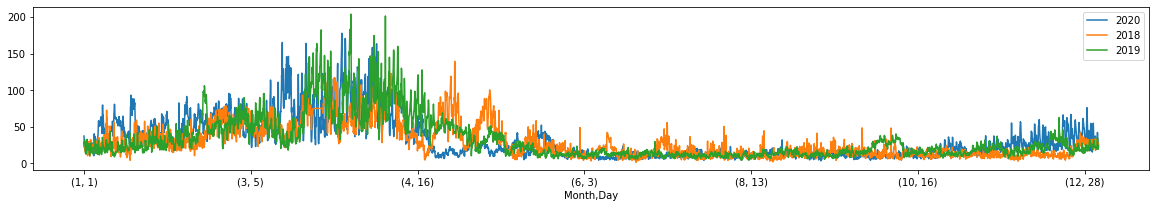

In [ ]:
pm25_Chiang_Mai_monthdate.plot()

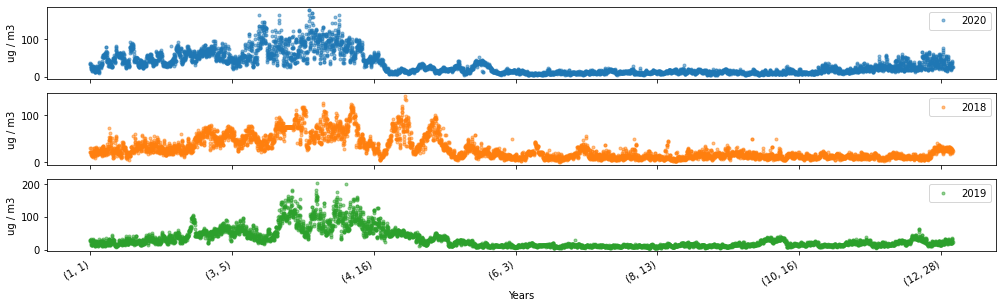

In [ ]:
axes = pm25_Chiang_Mai_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

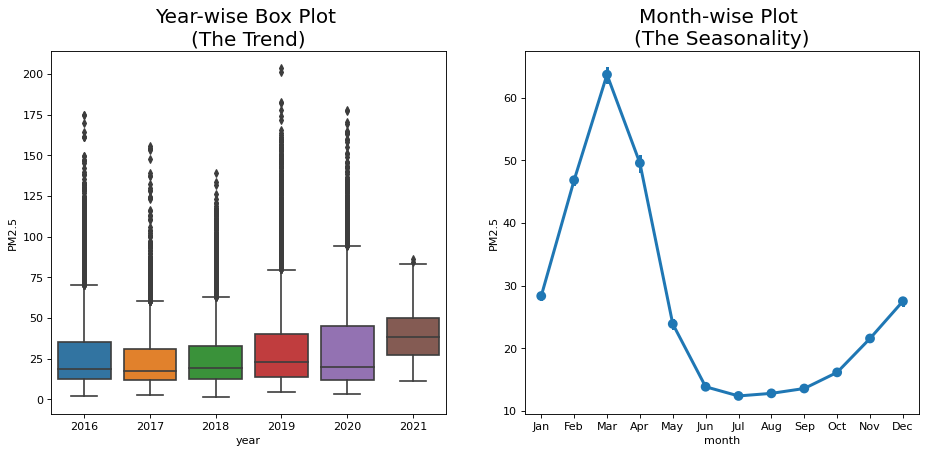

In [ ]:
trend_plot(pm25_Chiang_Mai)

##### lockdown Chiang Mai

In [ ]:
lockdown = pm25_Chiang_Mai.loc['2020-03-26':'2020-05-31']
Chiang_Mai_year2019_lockdown = pd.DataFrame(pm25_Chiang_Mai.loc['2019-03-26':'2019-05-31'])
Chiang_Mai_year2018_lockdown = pd.DataFrame(pm25_Chiang_Mai.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Chiang_Mai_year2019_lockdown.index, y=Chiang_Mai_year2019_lockdown['PM2.5'],
                    marker=dict(color=Chiang_Mai_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Chiang_Mai_year2018_lockdown.index, y=Chiang_Mai_year2018_lockdown['PM2.5'],
                    marker=dict(color=Chiang_Mai_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Chiang_Mai_year2019_lockdown,Chiang_Mai_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

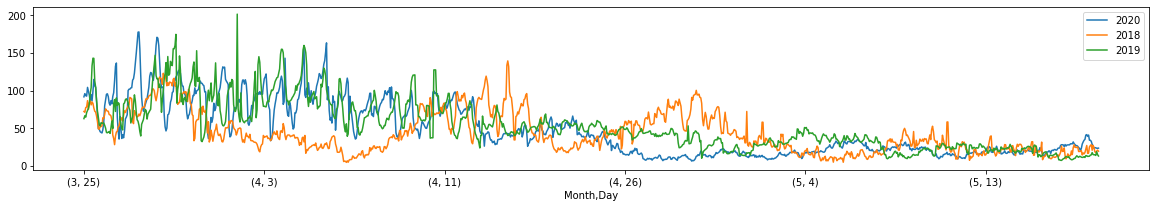

In [ ]:
lockdown_monthdate.plot()
plt.show()

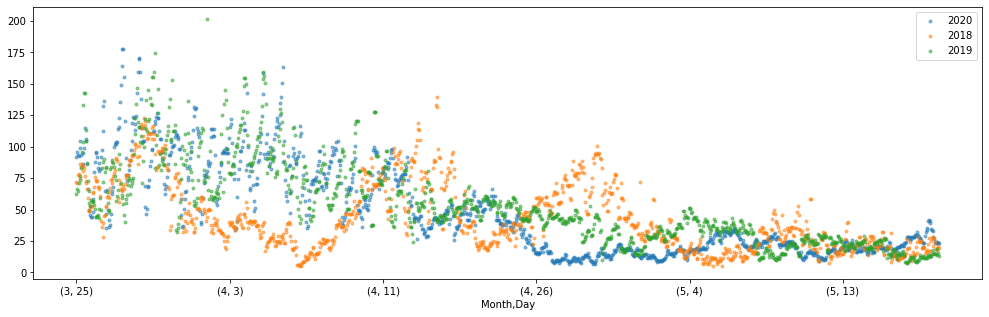

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_chiang_mai_lockdown =  pd.read_csv('/content/Final2/wind/Chiang_Mai_wind_1.csv')

In [ ]:
wind_chiang_mai_lockdown['Date'] = pd.to_datetime(wind_chiang_mai_lockdown['Date'],yearfirst=True)
wind_chiang_mai_lockdown['Speed'] = wind_chiang_mai_lockdown[wind_chiang_mai_lockdown['Speed']!='\xa0-']['Speed'].astype('float64')
wind_chiang_mai_lockdown['Dir'] = wind_chiang_mai_lockdown[wind_chiang_mai_lockdown['Dir']!='\xa0-']['Dir'].astype('int64')

In [ ]:
wind_chiang_mai_lockdown = wind_chiang_mai_lockdown.set_index('Date')
wind_chiang_mai_lockdown = wind_chiang_mai_lockdown.loc['2020-03-26':'2020-05-31']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



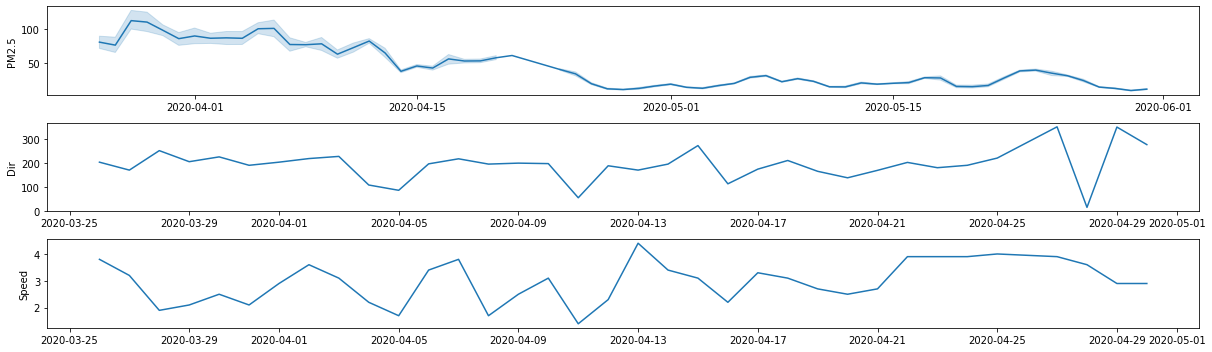

In [ ]:
plot_wind(wind_chiang_mai_lockdown,lockdown)

#### Chon Buri Data

In [ ]:
pm25_Chon_Buri = pd.DataFrame()
pm25_Chon_Buri = pd.read_csv('/content/Final2/Chon_Buri.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Chon_Buri['datetime'] = pd.to_datetime({'year': pm25_Chon_Buri['Year'], 'month': pm25_Chon_Buri['Month'], 'day':pm25_Chon_Buri['Day'],'hour': pm25_Chon_Buri['UTC_Hour']})
pm25_Chon_Buri = pm25_Chon_Buri.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Chon_Buri['datetime'] = pm25_Chon_Buri['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Chon_Buri['datetime'] = pm25_Chon_Buri['datetime'].dt.tz_localize(None)
pm25_Chon_Buri = pm25_Chon_Buri.set_index('datetime')
pm25_Chon_Buri = pm25_Chon_Buri[~pm25_Chon_Buri.index.duplicated(keep='first')]
pm25_Chon_Buri.index = pd.DatetimeIndex(pm25_Chon_Buri.index)

In [ ]:
pm25_Chon_Buri.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Chon_Buri_2018 =  pm25_Chon_Buri[pm25_Chon_Buri['Year']==2018]
pm25_Chon_Buri_2019 =  pm25_Chon_Buri[pm25_Chon_Buri['Year']==2019]
pm25_Chon_Buri_2020 =  pm25_Chon_Buri[pm25_Chon_Buri['Year']==2020]

In [ ]:
pm25_Chon_Buri_monthdate = to_monthdate(pm25_Chon_Buri_2020,pm25_Chon_Buri_2019,pm25_Chon_Buri_2018)

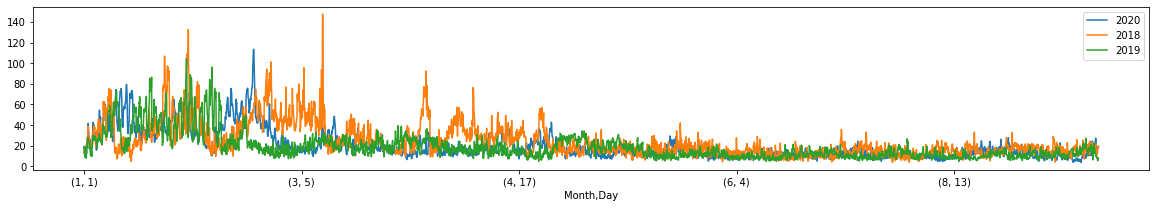

In [ ]:
pm25_Chon_Buri_monthdate.plot()

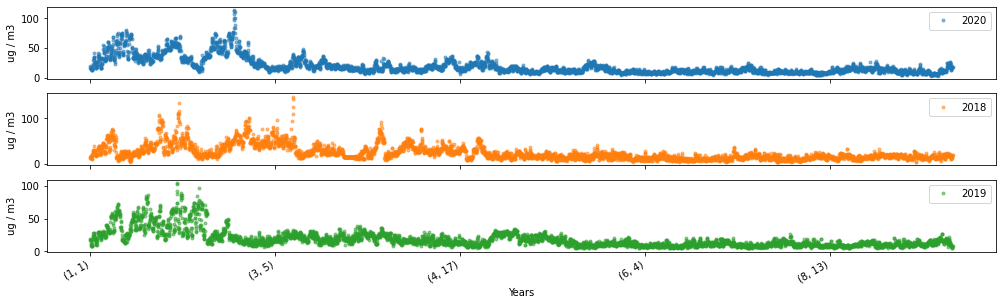

In [ ]:
axes = pm25_Chon_Buri_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

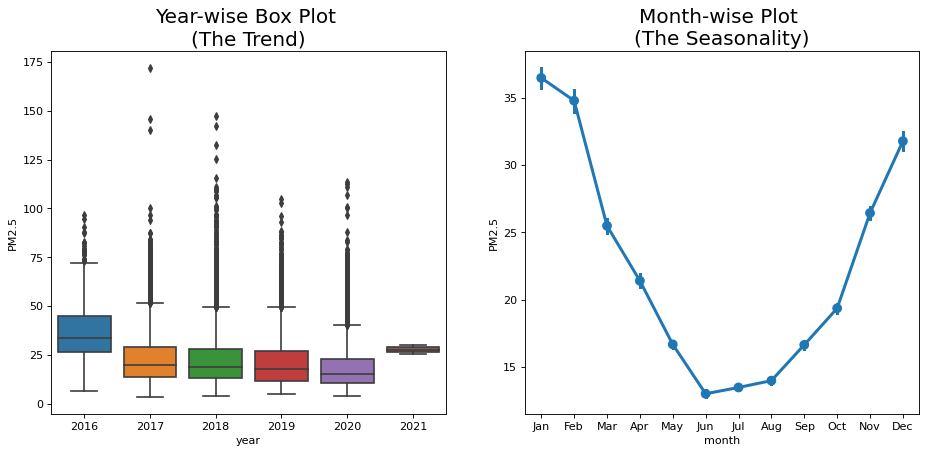

In [ ]:
trend_plot(pm25_Chon_Buri)

##### lockdown1 Chon Buri

In [ ]:
lockdown = pm25_Chon_Buri.loc['2020-03-26':'2020-05-31']
Chon_Buri_year2019_lockdown = pd.DataFrame(pm25_Chon_Buri.loc['2019-03-26':'2019-05-31'])
Chon_Buri_year2018_lockdown = pd.DataFrame(pm25_Chon_Buri.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Chon_Buri_year2019_lockdown.index, y=Chon_Buri_year2019_lockdown['PM2.5'],
                    marker=dict(color=Chon_Buri_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Chon_Buri_year2018_lockdown.index, y=Chon_Buri_year2018_lockdown['PM2.5'],
                    marker=dict(color=Chon_Buri_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Chon_Buri_year2019_lockdown,Chon_Buri_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

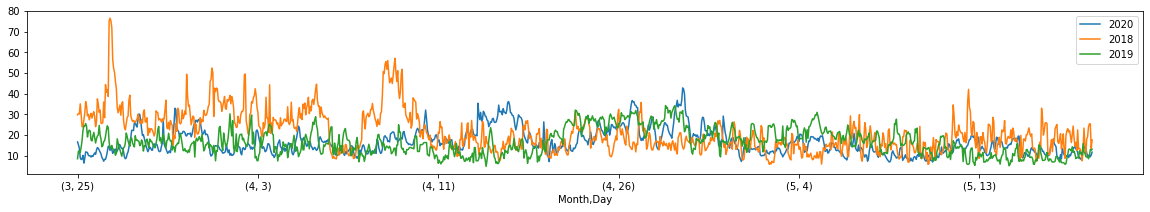

In [ ]:
lockdown_monthdate.plot()
plt.show()

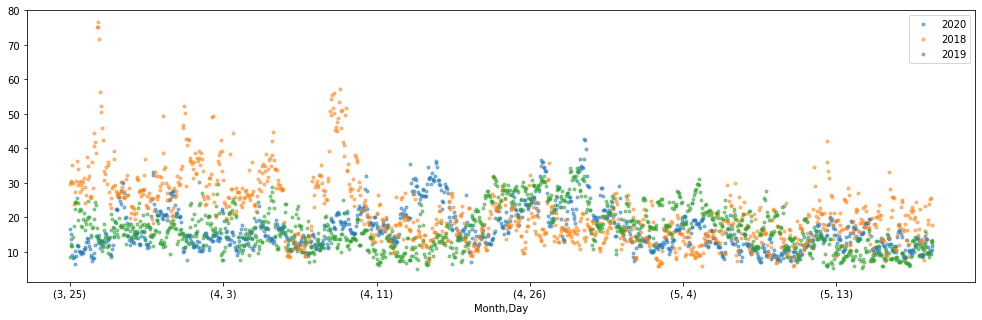

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_chon_buri_lockdown =  pd.read_csv('/content/Final2/wind/Chon_Buri_wind_1.csv')

In [ ]:
wind_chon_buri_lockdown['Date'] = pd.to_datetime(wind_chon_buri_lockdown['Date'],yearfirst=True)
wind_chon_buri_lockdown['Speed'] = wind_chon_buri_lockdown[wind_chon_buri_lockdown['Speed']!='\xa0-']['Speed'].astype('float64')
wind_chon_buri_lockdown['Dir'] = wind_chon_buri_lockdown[wind_chon_buri_lockdown['Dir']!='\xa0-']['Dir'].astype('int64')

In [ ]:
wind_chon_buri_lockdown = wind_chon_buri_lockdown.set_index('Date')
wind_chon_buri_lockdown = wind_chon_buri_lockdown.loc['2020-03-26':'2020-05-31']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



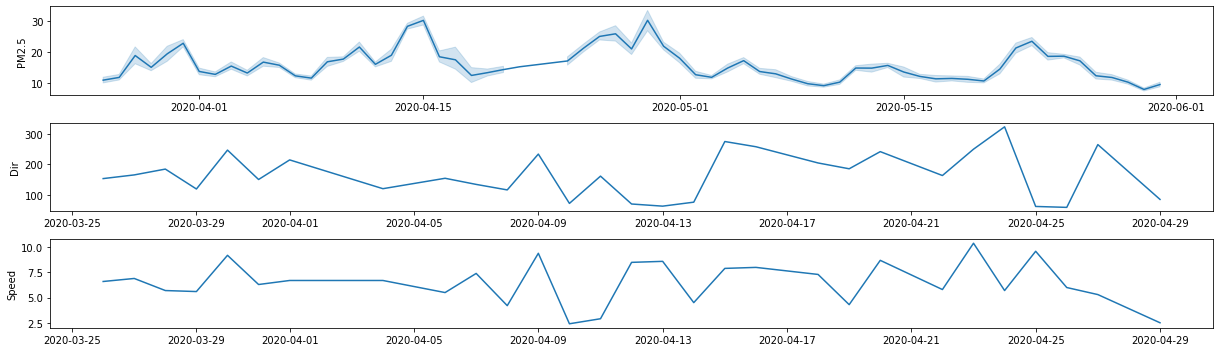

In [ ]:
plot_wind(wind_chon_buri_lockdown,lockdown)

#### Kanchanaburi Data

In [ ]:
pm25_Kanchanaburi = pd.DataFrame()
pm25_Kanchanaburi = pd.read_csv('/content/Final2/Kanchanaburi.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Kanchanaburi['datetime'] = pd.to_datetime({'year': pm25_Kanchanaburi['Year'], 'month': pm25_Kanchanaburi['Month'], 'day':pm25_Kanchanaburi['Day'],'hour': pm25_Kanchanaburi['UTC_Hour']})
pm25_Kanchanaburi = pm25_Kanchanaburi.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Kanchanaburi['datetime'] = pm25_Kanchanaburi['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Kanchanaburi['datetime'] = pm25_Kanchanaburi['datetime'].dt.tz_localize(None)
pm25_Kanchanaburi = pm25_Kanchanaburi.set_index('datetime')
pm25_Kanchanaburi = pm25_Kanchanaburi[~pm25_Kanchanaburi.index.duplicated(keep='first')]
pm25_Kanchanaburi.index = pd.DatetimeIndex(pm25_Kanchanaburi.index)

In [ ]:
pm25_Kanchanaburi.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Kanchanaburi_2018 =  pm25_Kanchanaburi[pm25_Kanchanaburi['Year']==2018]
pm25_Kanchanaburi_2019 =  pm25_Kanchanaburi[pm25_Kanchanaburi['Year']==2019]
pm25_Kanchanaburi_2020 =  pm25_Kanchanaburi[pm25_Kanchanaburi['Year']==2020]

In [ ]:
pm25_Kanchanaburi_monthdate = to_monthdate(pm25_Kanchanaburi_2020,pm25_Kanchanaburi_2019,pm25_Kanchanaburi_2018)

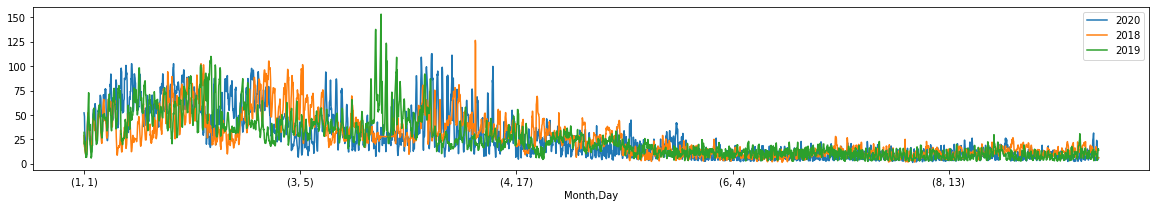

In [ ]:
pm25_Kanchanaburi_monthdate.plot()

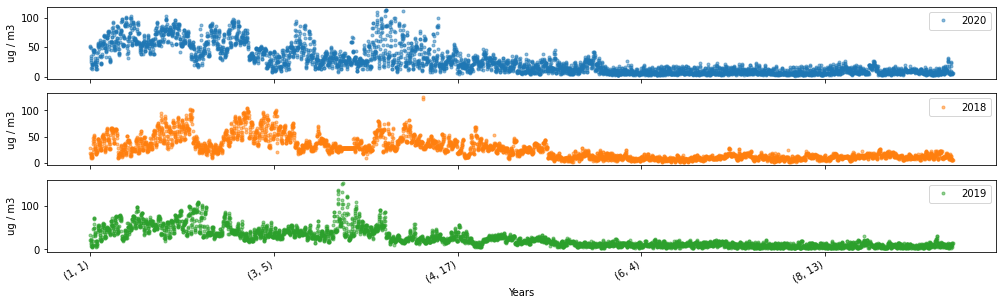

In [ ]:
axes = pm25_Kanchanaburi_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

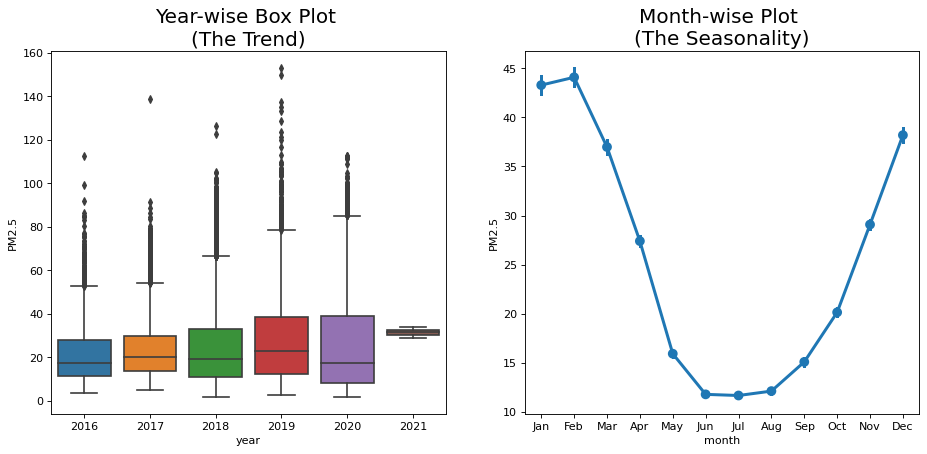

In [ ]:
trend_plot(pm25_Kanchanaburi)

##### lockdown Kanchanaburi

In [ ]:
lockdown = pm25_Kanchanaburi.loc['2020-03-26':'2020-05-31']
Kanchanaburi_year2019_lockdown = pd.DataFrame(pm25_Kanchanaburi.loc['2019-03-26':'2019-05-31'])
Kanchanaburi_year2018_lockdown = pd.DataFrame(pm25_Kanchanaburi.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Kanchanaburi_year2019_lockdown.index, y=Kanchanaburi_year2019_lockdown['PM2.5'],
                    marker=dict(color=Kanchanaburi_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Kanchanaburi_year2018_lockdown.index, y=Kanchanaburi_year2018_lockdown['PM2.5'],
                    marker=dict(color=Kanchanaburi_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Kanchanaburi_year2019_lockdown,Kanchanaburi_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

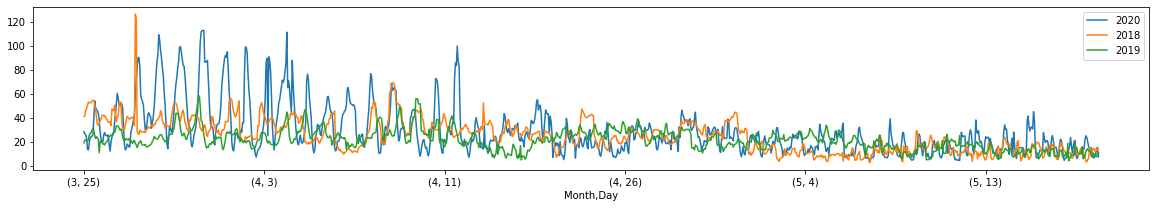

In [ ]:
lockdown_monthdate.plot()
plt.show()

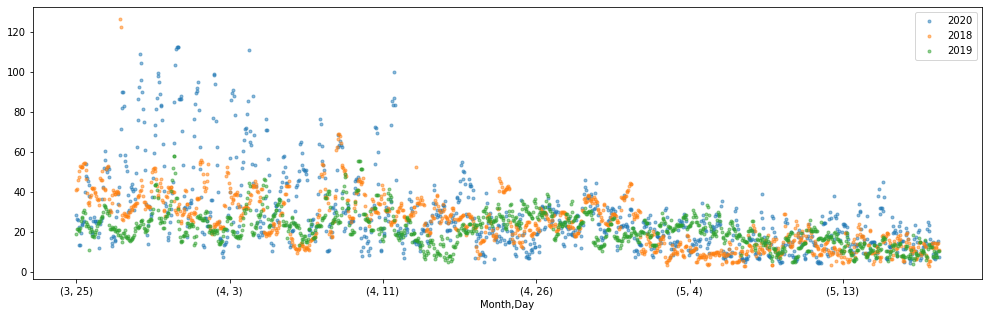

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_kanchanaburi_lockdown =  pd.read_csv('/content/Final2/wind/Kanchanaburi_wind_1.csv')

In [ ]:
wind_kanchanaburi_lockdown['Date'] = pd.to_datetime(wind_kanchanaburi_lockdown['Date'],yearfirst=True)
wind_kanchanaburi_lockdown['Speed'] = wind_kanchanaburi_lockdown[wind_kanchanaburi_lockdown['Speed']!='\xa0-']['Speed'].astype('float64')
wind_kanchanaburi_lockdown['Dir'] = wind_kanchanaburi_lockdown[wind_kanchanaburi_lockdown['Dir']!='\xa0-']['Dir'].astype('int64')

In [ ]:
wind_kanchanaburi_lockdown = wind_kanchanaburi_lockdown.set_index('Date')
wind_kanchanaburi_lockdown = wind_kanchanaburi_lockdown.loc['2020-03-26':'2020-05-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



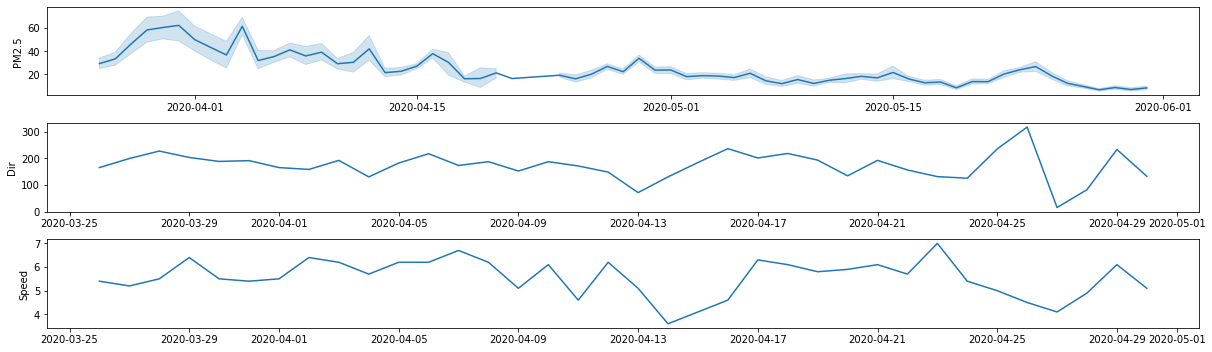

In [ ]:
plot_wind(wind_kanchanaburi_lockdown,lockdown)

#### Khon Kaen Data

In [ ]:
pm25_Khon_Kaen = pd.DataFrame()
pm25_Khon_Kaen = pd.read_csv('/content/Final2/Khon_Kaen.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Khon_Kaen['datetime'] = pd.to_datetime({'year': pm25_Khon_Kaen['Year'], 'month': pm25_Khon_Kaen['Month'], 'day':pm25_Khon_Kaen['Day'],'hour': pm25_Khon_Kaen['UTC_Hour']})
pm25_Khon_Kaen = pm25_Khon_Kaen.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Khon_Kaen['datetime'] = pm25_Khon_Kaen['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Khon_Kaen['datetime'] = pm25_Khon_Kaen['datetime'].dt.tz_localize(None)
pm25_Khon_Kaen = pm25_Khon_Kaen.set_index('datetime')
pm25_Khon_Kaen = pm25_Khon_Kaen[~pm25_Khon_Kaen.index.duplicated(keep='first')]
pm25_Khon_Kaen.index = pd.DatetimeIndex(pm25_Khon_Kaen.index)

In [ ]:
pm25_Khon_Kaen.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Khon_Kaen_2018 =  pm25_Khon_Kaen[pm25_Khon_Kaen['Year']==2018]
pm25_Khon_Kaen_2019 =  pm25_Khon_Kaen[pm25_Khon_Kaen['Year']==2019]
pm25_Khon_Kaen_2020 =  pm25_Khon_Kaen[pm25_Khon_Kaen['Year']==2020]

In [ ]:
pm25_Khon_Kaen_monthdate = to_monthdate(pm25_Khon_Kaen_2020,pm25_Khon_Kaen_2019,pm25_Khon_Kaen_2018)

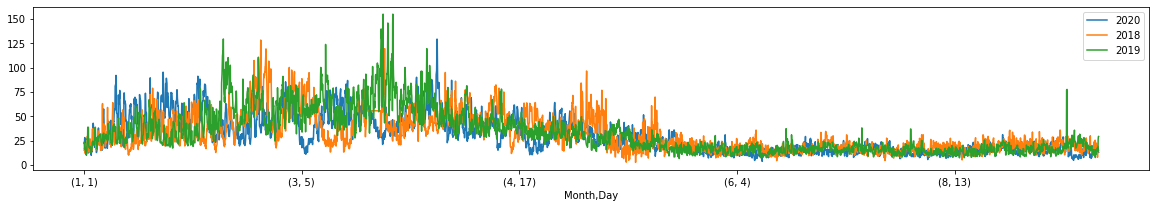

In [ ]:
pm25_Khon_Kaen_monthdate.plot()

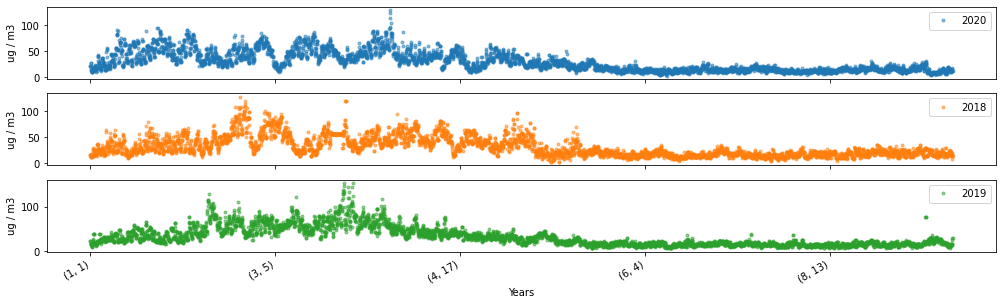

In [ ]:
axes = pm25_Khon_Kaen_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

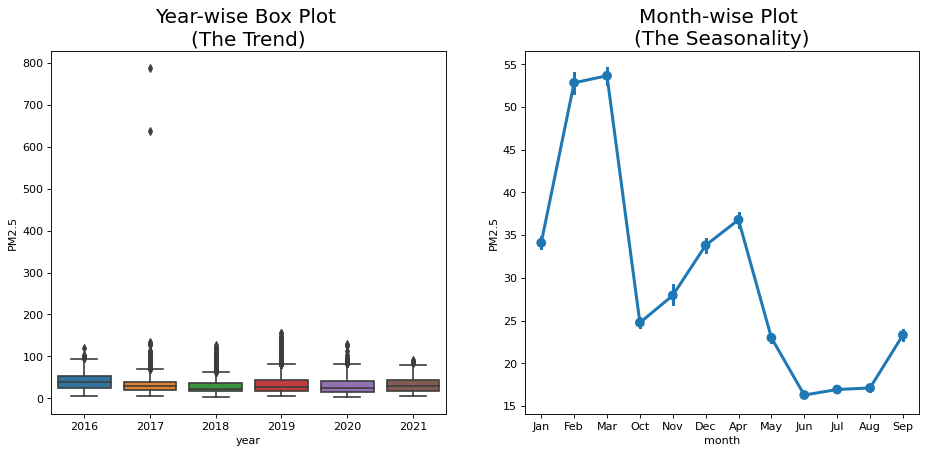

In [ ]:
trend_plot(pm25_Khon_Kaen)

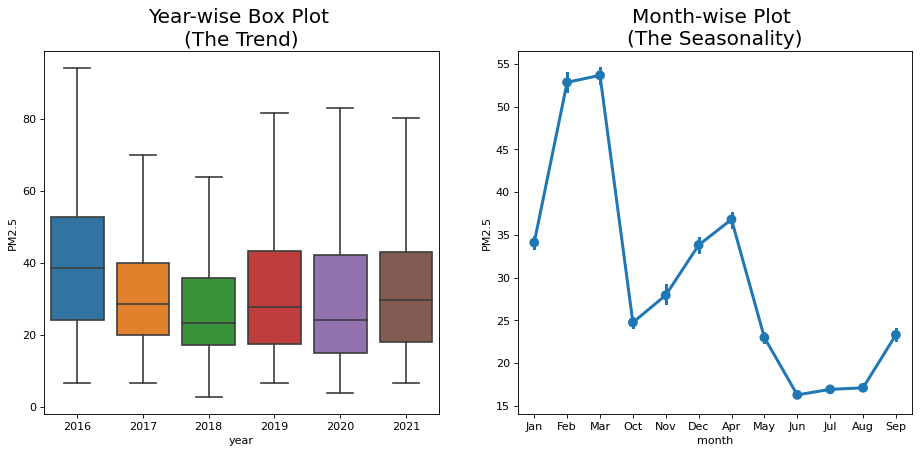

In [ ]:
trend_plot_no_outliers(pm25_Khon_Kaen)

##### lockdown Khon Kaen

In [ ]:
lockdown = pm25_Khon_Kaen.loc['2020-03-26':'2020-05-31']
Khon_Kaen_year2019_lockdown = pd.DataFrame(pm25_Khon_Kaen.loc['2019-03-26':'2019-05-31'])
Khon_Kaen_year2018_lockdown = pd.DataFrame(pm25_Khon_Kaen.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Khon_Kaen_year2019_lockdown.index, y=Khon_Kaen_year2019_lockdown['PM2.5'],
                    marker=dict(color=Khon_Kaen_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Khon_Kaen_year2018_lockdown.index, y=Khon_Kaen_year2018_lockdown['PM2.5'],
                    marker=dict(color=Khon_Kaen_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Khon_Kaen_year2019_lockdown,Khon_Kaen_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

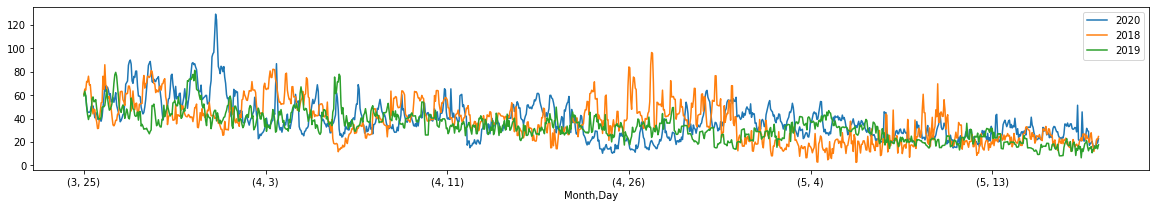

In [ ]:
lockdown_monthdate.plot()
plt.show()

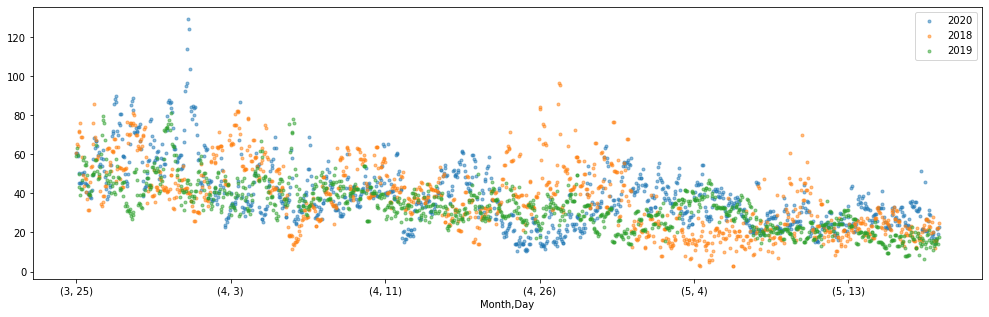

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_khon_kaen_lockdown =  pd.read_csv('/content/Final2/wind/Khon_Kaen_wind_1.csv')

In [ ]:
wind_khon_kaen_lockdown['Date'] = pd.to_datetime(wind_khon_kaen_lockdown['Date'],yearfirst=True)
wind_khon_kaen_lockdown['Speed'] = wind_khon_kaen_lockdown[wind_khon_kaen_lockdown['Speed']!='\xa0-']['Speed'].astype('float64')
wind_khon_kaen_lockdown['Dir'] = wind_khon_kaen_lockdown[wind_khon_kaen_lockdown['Dir']!='\xa0-']['Dir'].astype('int64')

In [ ]:
wind_khon_kaen_lockdown = wind_khon_kaen_lockdown.set_index('Date')
wind_khon_kaen_lockdown = wind_khon_kaen_lockdown.loc['2020-03-26':'2020-05-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



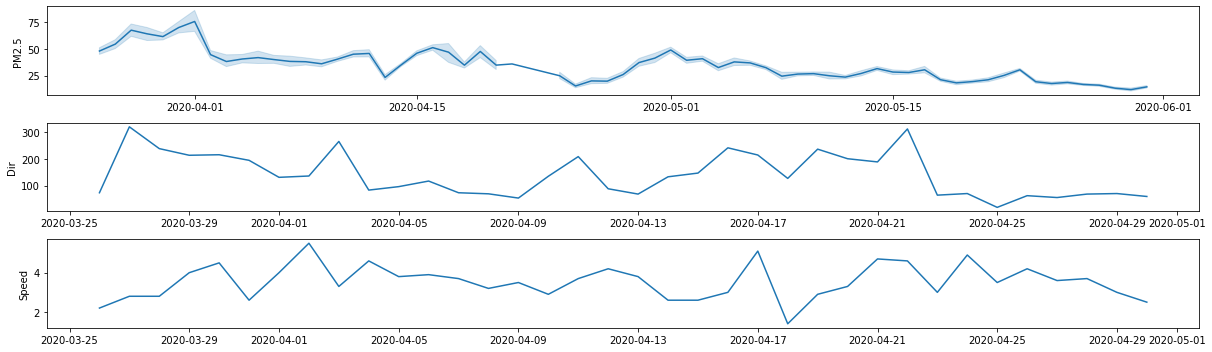

In [ ]:
plot_wind(wind_khon_kaen_lockdown,lockdown)

#### Songkhla Data

In [ ]:
pm25_Songkhla = pd.DataFrame()
pm25_Songkhla = pd.read_csv('/content/Final2/Songkhla.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Songkhla['datetime'] = pd.to_datetime({'year': pm25_Songkhla['Year'], 'month': pm25_Songkhla['Month'], 'day':pm25_Songkhla['Day'],'hour': pm25_Songkhla['UTC_Hour']})
pm25_Songkhla = pm25_Songkhla.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Songkhla['datetime'] = pm25_Songkhla['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Songkhla['datetime'] = pm25_Songkhla['datetime'].dt.tz_localize(None)
pm25_Songkhla = pm25_Songkhla.set_index('datetime')
pm25_Songkhla = pm25_Songkhla[~pm25_Songkhla.index.duplicated(keep='first')]
pm25_Songkhla.index = pd.DatetimeIndex(pm25_Songkhla.index)

In [ ]:
pm25_Songkhla.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Songkhla_2018 =  pm25_Songkhla[pm25_Songkhla['Year']==2018]
pm25_Songkhla_2019 =  pm25_Songkhla[pm25_Songkhla['Year']==2019]
pm25_Songkhla_2020 =  pm25_Songkhla[pm25_Songkhla['Year']==2020]

In [ ]:
pm25_Songkhla_monthdate = to_monthdate(pm25_Songkhla_2020,pm25_Songkhla_2019,pm25_Songkhla_2018)

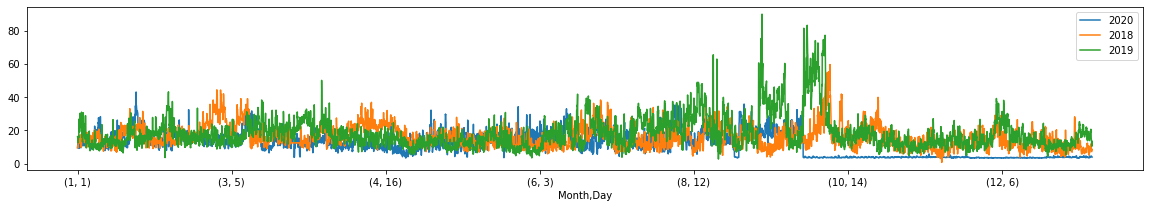

In [ ]:
pm25_Songkhla_monthdate.plot()

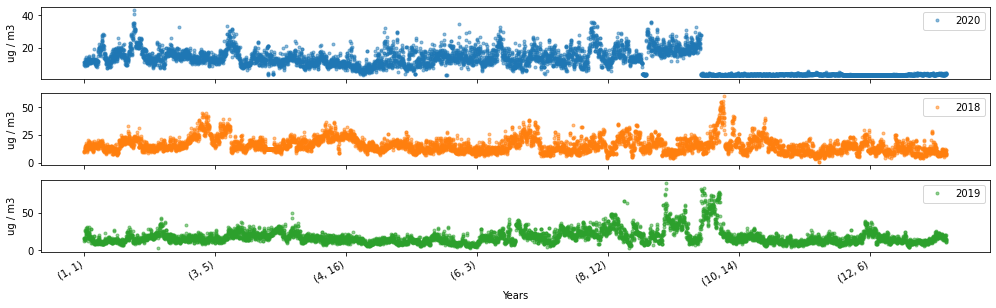

In [ ]:
axes = pm25_Songkhla_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

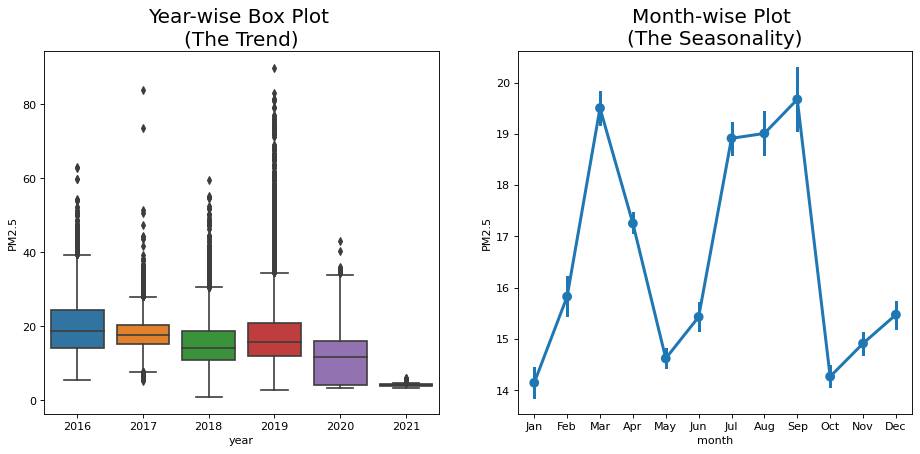

In [ ]:
trend_plot(pm25_Songkhla)

##### lockdown Songkhla

In [ ]:
lockdown = pm25_Songkhla.loc['2020-03-26':'2020-05-31']
Songkhla_year2019_lockdown = pd.DataFrame(pm25_Songkhla.loc['2019-03-26':'2019-05-31'])
Songkhla_year2018_lockdown = pd.DataFrame(pm25_Songkhla.loc['2018-03-26':'2018-05-31'])

In [ ]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("2020","2019","2018"))

fig.add_trace(go.Bar(x=lockdown.index, y=lockdown['PM2.5'],
                    marker=dict(color=lockdown['PM2.5'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=Songkhla_year2019_lockdown.index, y=Songkhla_year2019_lockdown['PM2.5'],
                    marker=dict(color=Songkhla_year2019_lockdown['PM2.5'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=Songkhla_year2018_lockdown.index, y=Songkhla_year2018_lockdown['PM2.5'],
                    marker=dict(color=Songkhla_year2018_lockdown['PM2.5'], coloraxis="coloraxis")),
              3, 1)
fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

In [ ]:
lockdown_monthdate= to_monthdate(lockdown,Songkhla_year2019_lockdown,Songkhla_year2018_lockdown)

In [ ]:
lockdown_monthdate = lockdown_monthdate.drop(['year','month'],axis=1)

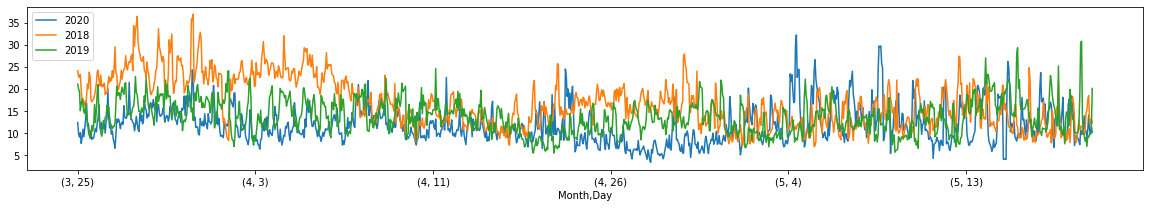

In [ ]:
lockdown_monthdate.plot()
plt.show()

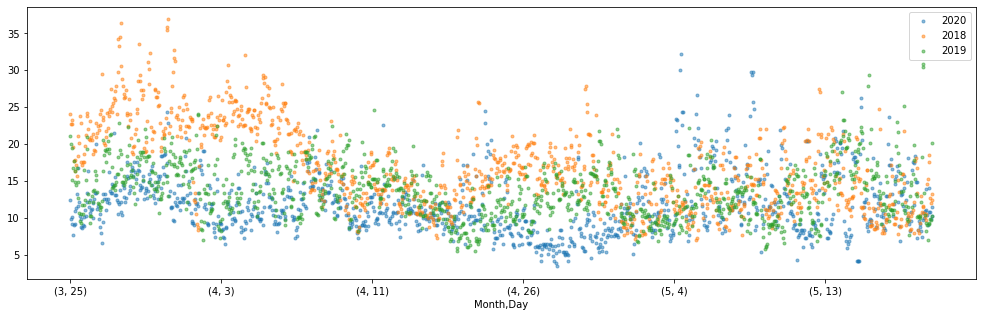

In [ ]:
axes = lockdown_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5))

In [ ]:
wind_songkhla_lockdown =  pd.read_csv('/content/Final2/wind/Songkhla_wind_1.csv')

In [ ]:
wind_songkhla_lockdown['Date'] = pd.to_datetime(wind_songkhla_lockdown['Date'],yearfirst=True)
wind_songkhla_lockdown['Speed'] = wind_songkhla_lockdown[wind_songkhla_lockdown['Speed']!='\xa0-']['Speed'].astype('float64')
wind_songkhla_lockdown['Dir'] = wind_songkhla_lockdown[wind_songkhla_lockdown['Dir']!='\xa0-']['Dir'].astype('int64')

In [ ]:
wind_songkhla_lockdown = wind_songkhla_lockdown.set_index('Date')
wind_songkhla_lockdown = wind_songkhla_lockdown.loc['2020-03-26':'2020-05-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



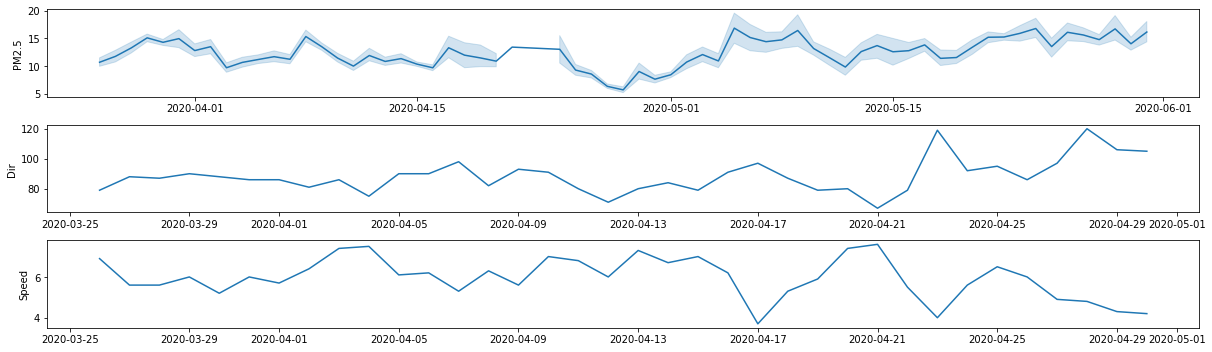

In [ ]:
plot_wind(wind_songkhla_lockdown,lockdown)

#### Thailand Data

In [ ]:
pm25_Thailand = pd.DataFrame()
pm25_Thailand = pd.read_csv('/content/Final2/Thailand.txt',skiprows=10, names=['Year', 'Month', 'Day', 'UTC_Hour','PM2.5','PM10_mask','Retrospective'],delimiter="\t")
pm25_Thailand['datetime'] = pd.to_datetime({'year': pm25_Thailand['Year'], 'month': pm25_Thailand['Month'], 'day':pm25_Thailand['Day'],'hour': pm25_Thailand['UTC_Hour']})
pm25_Thailand = pm25_Thailand.drop(['PM10_mask','Retrospective'],axis=1)
pm25_Thailand['datetime'] = pm25_Thailand['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
pm25_Thailand['datetime'] = pm25_Thailand['datetime'].dt.tz_localize(None)
pm25_Thailand = pm25_Thailand.set_index('datetime')
pm25_Thailand = pm25_Thailand[~pm25_Thailand.index.duplicated(keep='first')]
pm25_Thailand.index = pd.DatetimeIndex(pm25_Thailand.index)

In [ ]:
pm25_Thailand.isnull().sum()

Year        0
Month       0
Day         0
UTC_Hour    0
PM2.5       0
dtype: int64

In [ ]:
pm25_Thailand_2018 =  pm25_Thailand[pm25_Thailand['Year']==2018]
pm25_Thailand_2019 =  pm25_Thailand[pm25_Thailand['Year']==2019]
pm25_Thailand_2020 =  pm25_Thailand[pm25_Thailand['Year']==2020]

In [ ]:
pm25_Thailand_monthdate = to_monthdate(pm25_Thailand_2020,pm25_Thailand_2019,pm25_Thailand_2018)

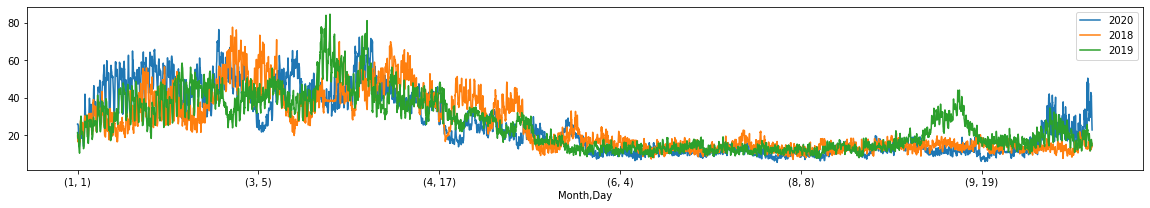

In [ ]:
pm25_Thailand_monthdate.plot()

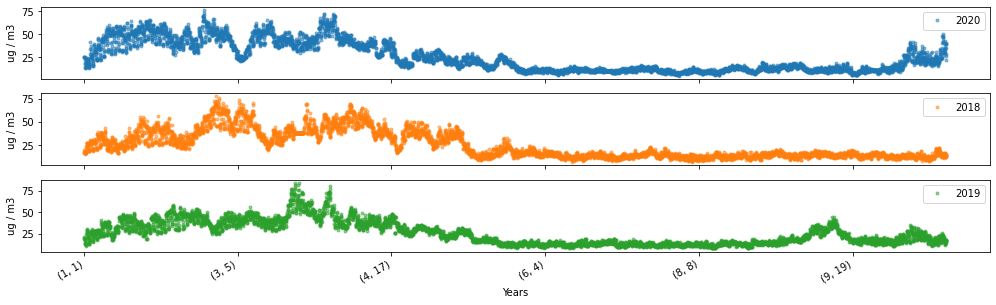

In [ ]:
axes = pm25_Thailand_monthdate.plot(marker='.', alpha=0.5, linestyle='None', figsize=(17, 5), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

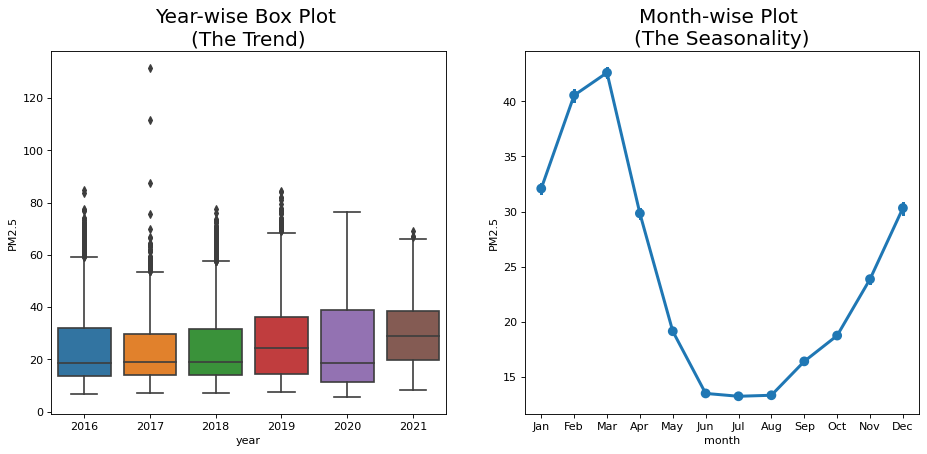

In [ ]:
trend_plot(pm25_Thailand)

In [ ]:
pm25_Bangkok['City'] = 'Bangkok'
pm25_Chiang_Mai['City'] = 'Chiang_Mai'
pm25_Chon_Buri['City'] = 'Chon_Buri'
pm25_Kanchanaburi['City'] = 'Kanchanaburi'
pm25_Khon_Kaen['City'] = 'Khon_Kaen'
pm25_Songkhla['City'] = 'Songkhla'

In [ ]:
all_pm25 = pm25_Bangkok.append(pm25_Chiang_Mai)
all_pm25 = all_pm25.append(pm25_Chon_Buri)
all_pm25 = all_pm25.append(pm25_Kanchanaburi)
all_pm25 = all_pm25.append(pm25_Khon_Kaen)
all_pm25 = all_pm25.append(pm25_Songkhla)

In [ ]:
x= all_pm25[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()

In [ ]:
x

City  PM2.5
0     Khon_Kaen   26.7
1       Bangkok   21.2
2    Chiang_Mai   20.3
3  Kanchanaburi   19.4
4     Chon_Buri   18.3
5      Songkhla   15.7

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=1, cols=1,
    )

fig.add_trace(go.Bar( y=x['PM2.5'], x=x["City"],  
                     marker=dict(color=x['PM2.5'], coloraxis="coloraxis")),
              1, 1)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)

##### lockdown Thailand

In [ ]:
filtered_thailand = all_pm25.loc['2020-03-26':'2020-05-31']
PM25_lockdown = filtered_thailand[['City','PM2.5']]
PM25_lockdown.head()

City  PM2.5
datetime                           
2020-03-26 00:00:00  Bangkok   22.0
2020-03-26 01:00:00  Bangkok   18.5
2020-03-26 02:00:00  Bangkok   16.1
2020-03-26 03:00:00  Bangkok   14.9
2020-03-26 04:00:00  Bangkok   12.5

In [ ]:
x2= PM25_lockdown[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()

In [ ]:
x2

City  PM2.5
0     Khon_Kaen  31.40
1    Chiang_Mai  29.45
2  Kanchanaburi  20.50
3       Bangkok  17.85
4     Chon_Buri  14.60
5      Songkhla  11.90

In [ ]:
fig = make_subplots(
    rows=1, cols=1,
)

fig.add_trace(go.Bar( y=x2['PM2.5'], x=x2["City"],  
                     marker=dict(color=x2['PM2.5'], coloraxis="coloraxis")),
              1, 1)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)

In [ ]:
PM25_pivot = PM25_lockdown.pivot( columns='City', values='PM2.5')
PM25_pivot.fillna(method='bfill',inplace=True)

In [ ]:
PM25_pivot.head()

City                 Bangkok  Chiang_Mai  ...  Khon_Kaen  Songkhla
datetime                                  ...                     
2020-03-26 00:00:00     22.0        91.7  ...       60.8      12.4
2020-03-26 01:00:00     18.5        95.9  ...       60.7       9.9
2020-03-26 02:00:00     16.1        93.3  ...       59.3       9.1
2020-03-26 03:00:00     14.9        92.6  ...       50.7      10.1
2020-03-26 04:00:00     12.5       104.2  ...       45.5       7.7

[5 rows x 6 columns]

In [ ]:
fig = make_subplots(
    rows=6, cols=1,
    subplot_titles=("Bangkok","Chiang_Mai","Chon_Buri","Kanchanaburi",'Khon_Kaen','Songkhla'))

fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Bangkok'],
                    marker=dict(color=PM25_pivot['Bangkok'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Chiang_Mai'],
                    marker=dict(color=PM25_pivot['Chiang_Mai'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Chon_Buri'],
                    marker=dict(color=PM25_pivot['Chon_Buri'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Kanchanaburi'],
                    marker=dict(color=PM25_pivot['Kanchanaburi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Khon_Kaen'],
                    marker=dict(color=PM25_pivot['Khon_Kaen'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=PM25_pivot.index, y=PM25_pivot['Songkhla'],
                    marker=dict(color=PM25_pivot['Songkhla'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="PM2.5 Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout(height=1000)

fig.show()